In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm_notebook
from qutip import *

In [2]:
def connection(alpha1,alpha2,n_state,w,phi):
    n_state = n_state-1
    g=basis(3,0)
    e1=basis(3,1)
    e2=basis(3,2)

    H = 0.0
    temp = 1/2.0*w*g*g.dag()+1/2.0*w*e1*e1.dag()+1/2.0*w*e2*e2.dag()
    H += temp + temp.dag()
    temp = np.exp(1j*phi)*np.cos(alpha1 + alpha2)*g*e1.dag()
    H += temp + temp.dag()
    temp = np.exp(-1j*phi)*np.cos(alpha1)*g*e2.dag()
    H += temp + temp.dag()
    temp = np.exp(1j*phi)*np.cos(alpha2)*e1*e2.dag()
    H += temp + temp.dag()
    #hamiltonian
    H_alpha1 = 0.0
    temp = -np.exp(1j*phi)*np.sin(alpha1+alpha2)*g*e1.dag() - np.exp(-1j*phi)*np.sin(alpha1)*g*e2.dag()
    H_alpha1 = temp + temp.dag()
    
    H_alpha2 = 0.0
    temp = -np.exp(1j*phi)*np.sin(alpha1+alpha2)*g*e1.dag() - np.exp(1j*phi)*np.sin(alpha2)*e1*e2.dag()
    H_alpha2 = temp + temp.dag()
    #gradients of hamiltonian
    energy,state = H.eigenstates()
    
    result = 0.0
    for i in range(3):
        if not i == n_state:
            delta = (energy[i]-energy[n_state])
            result += -H_alpha1.matrix_element((state[n_state].dag()).unit(),(state[i]).unit())*H_alpha2.matrix_element((state[i].dag()).unit(),(state[n_state]).unit())/(delta*delta)
            result += +H_alpha2.matrix_element((state[n_state].dag()).unit(),(state[i]).unit())*H_alpha1.matrix_element((state[i].dag()).unit(),(state[n_state]).unit())/(delta*delta)
    return result

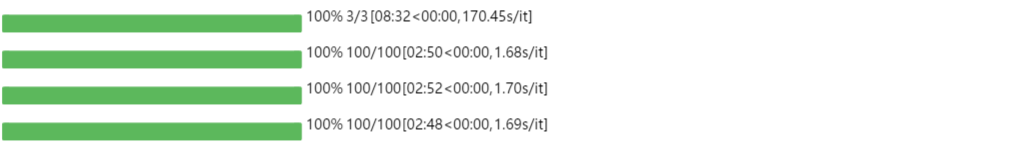

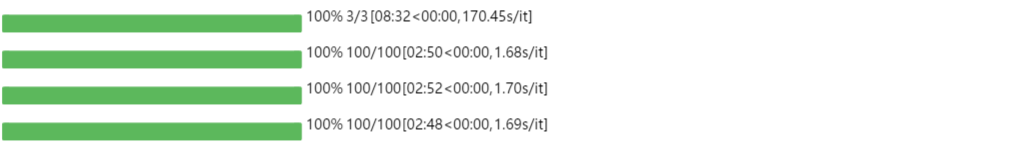

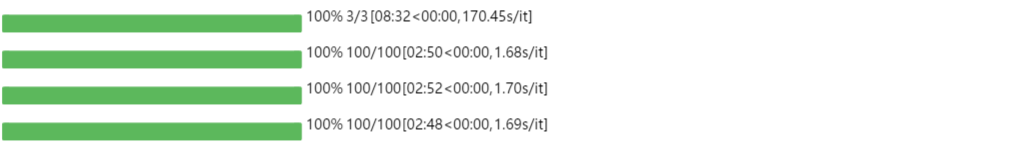

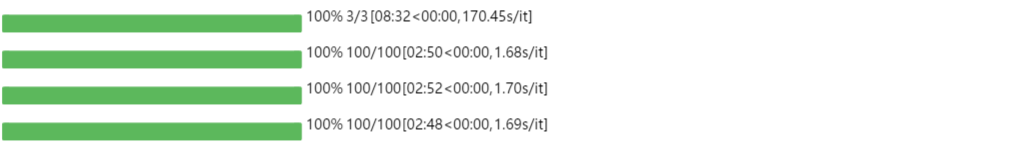

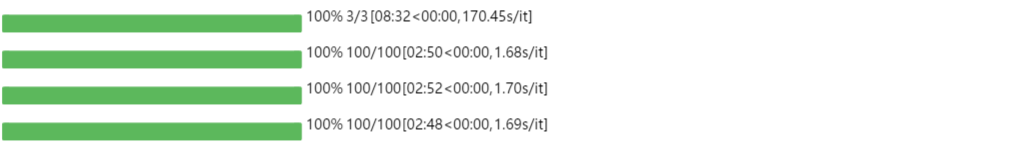

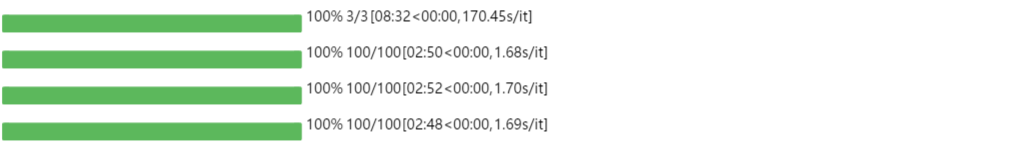

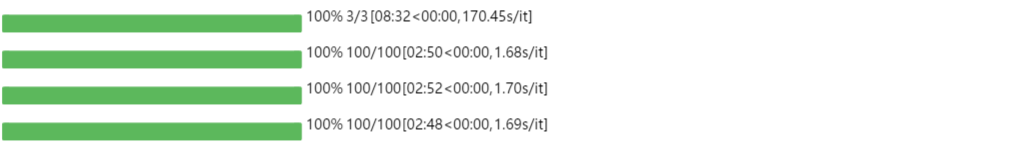

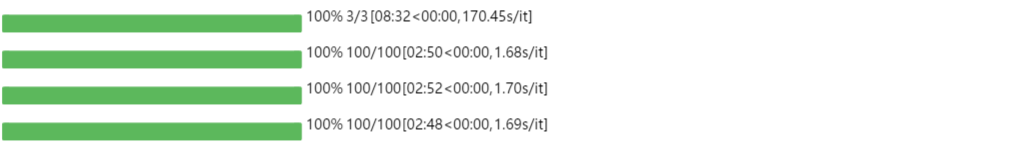

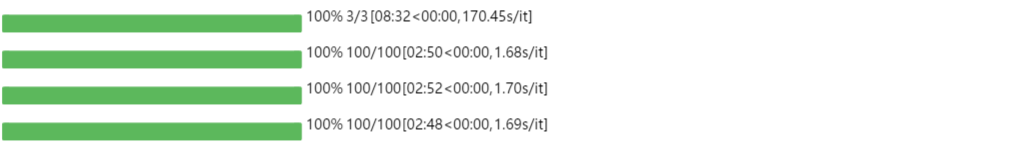

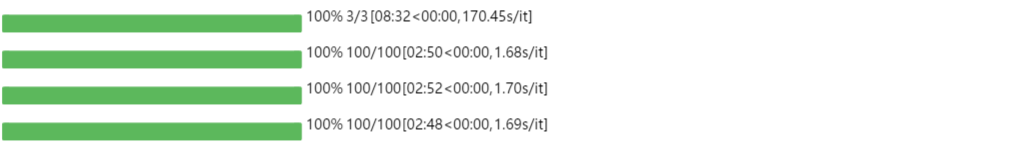

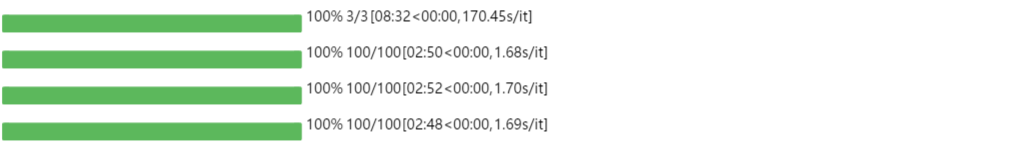

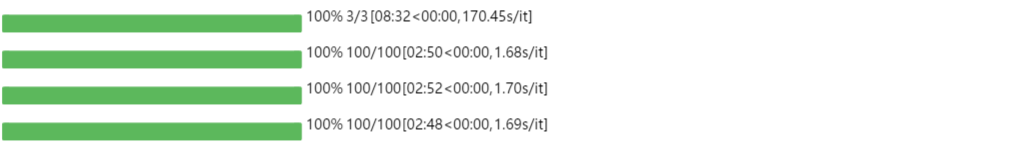

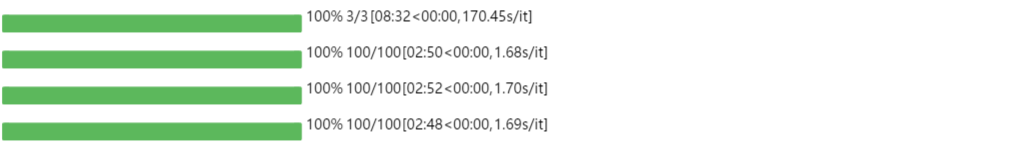

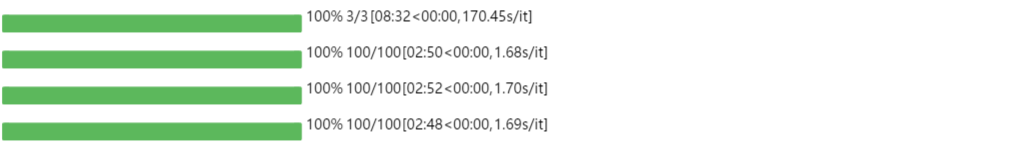

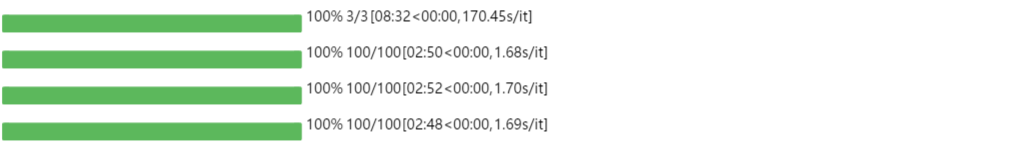

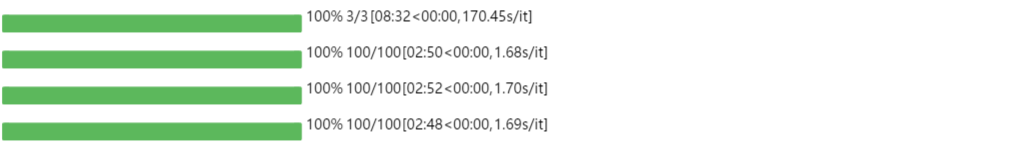

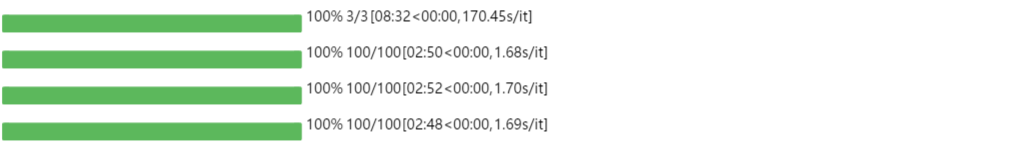

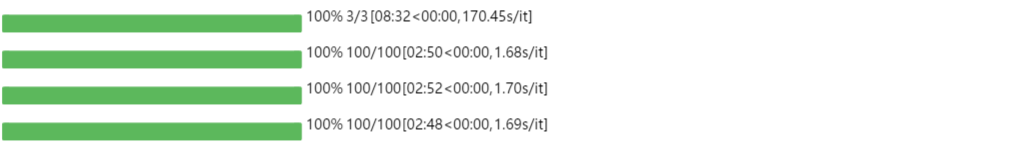

(-2.83700993637e-17+1.04153203657j)
(3.03952801379e-17-2.39185639114e-15j)
(-2.90430660976e-18-1.04153203657j)



In [3]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/4)*epsi
    print integral/(2*np.pi)/4

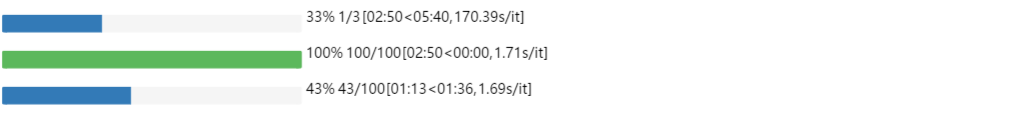

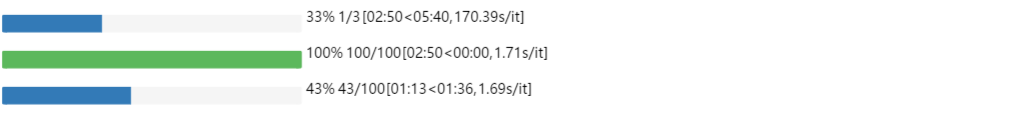

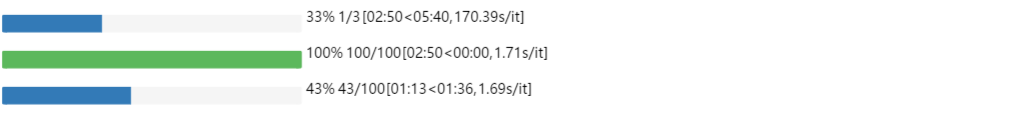

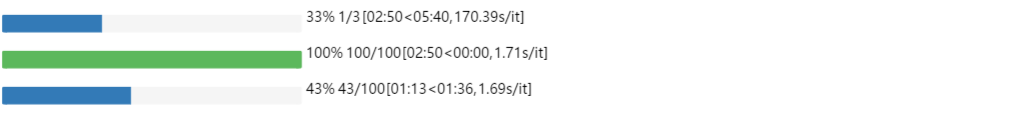

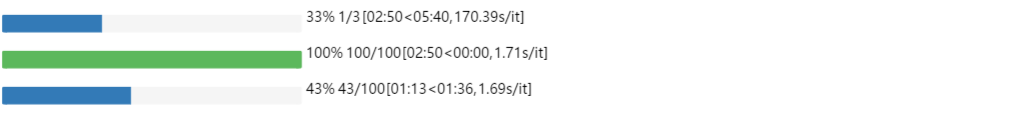

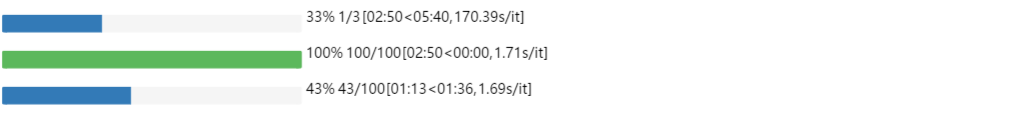

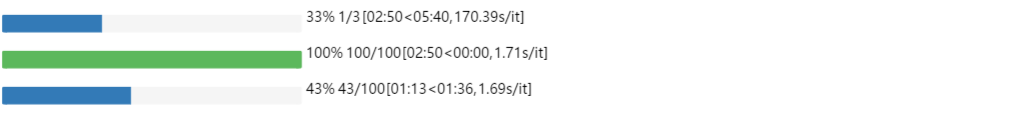

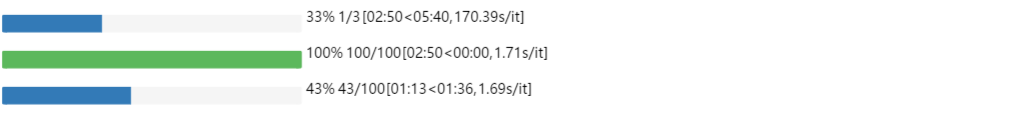

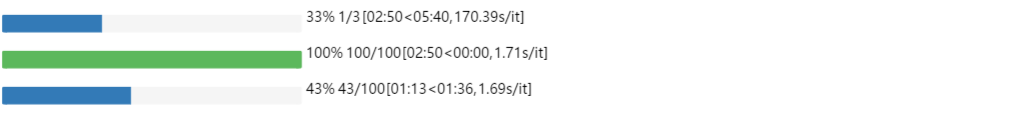

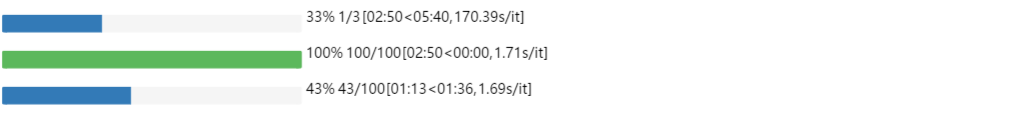

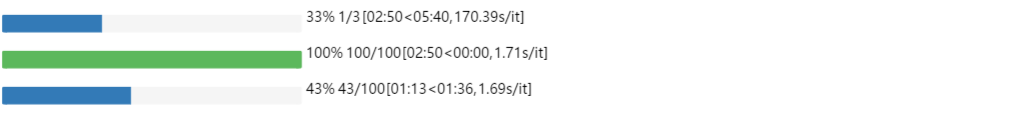

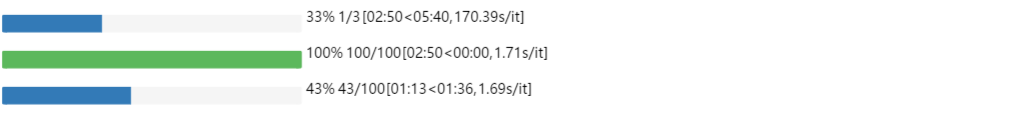

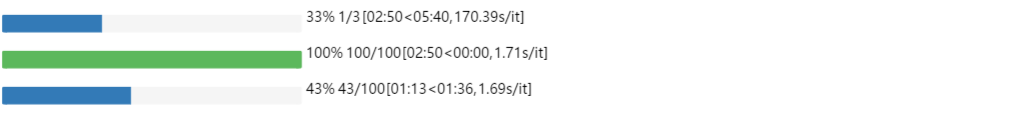

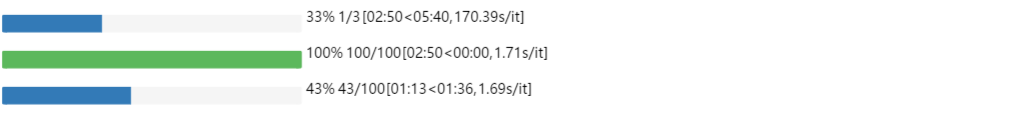

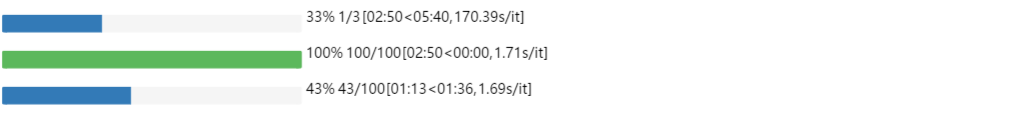

(1.49248137405e-18+0.981965821172j)
(-1.91608758122e-17-2.07094920455e-15j)
(1.76683944382e-17-0.981965821172j)


In [6]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/6)*epsi
    print integral/(2*np.pi)/6.0

In [7]:
step = 200
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/4)*epsi
    print integral/(2*np.pi)/4

(4.61888427118e-17+1.05282244451j)
(-3.33324759168e-17-2.56977473486e-15j)
(-1.28651108403e-17-1.05282244451j)



In [9]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/5)*epsi
    print integral/(2*np.pi)/5.0

(-1.33297385804e-18+1.12068599161j)
(9.49689560261e-18-2.50895673487e-15j)
(-8.86692954424e-18-1.12068599161j)



In [3]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
q = np.linspace(1,5,00)
ch = []
for i in tnrange(50):
    integral = 0
    for j in tnrange(step,leave=False):
        for k in range(step):
            integral += connection(alpha1[j],alpha2[k],1,0,np.pi/q[i])*epsi
    ch.append(np.imag(integral/(2.0*np.pi)/q[i]) + 0)

C:\Users\caidish\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\caidish\Anaconda2\lib\site-packages\qutip\qobj.py:1238: RuntimeWarning: invalid value encountered in absolute
  data_real[np.abs(data_real) < atol] = 0
C:\Users\caidish\Anaconda2\lib\site-packages\qutip\qobj.py:1238: RuntimeWarning: invalid value encountered in less
  data_real[np.abs(data_real) < atol] = 0
C:\Users\caidish\Anaconda2\lib\site-packages\qutip\qobj.py:1241: RuntimeWarning: invalid value encountered in absolute
  data_imag[np.abs(data_imag) < atol] = 0
C:\Users\caidish\Anaconda2\lib\site-packages\qutip\qobj.py:1241: RuntimeWarning: invalid value encountered in less
  data_imag[np.abs(data_imag) < atol] = 0
C:\Users\caidish\Anaconda2\lib\site-packages\qutip\qobj.py:1789: RuntimeWarning: invalid value encountered in greater
  self._isherm = False if np.any(h > settings.atol) else True


ValueError: array must not contain infs or NaNs

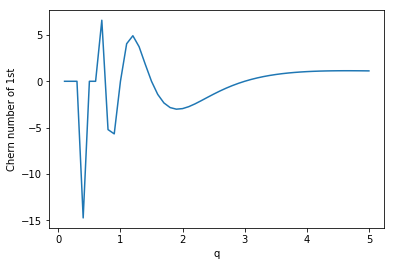

In [12]:
fig, ax = plt.subplots()
ax.plot(q,ch)
ax.set_xlabel('q')
ax.set_ylabel('Chern number of 1st')